In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [3]:

# 데이터 로드
data = pd.read_csv('./data/athena_pre.csv')

# 그룹화 및 정렬
df = data.groupby(['partition_0', 'partition_1', 'dep_sdt_hours'])['dep_week'].count().reset_index().sort_values(['partition_1', 'dep_sdt_hours'])
df.columns = ['partition_0', 'partition_1', 'hours', 'cnt']

# 가능한 모든 시간을 포함하는 리스트 생성
hours = np.arange(0, 24.5, 0.5)

# partition_0과 partition_1의 고유한 조합 추출
unique_combinations = data[['partition_0', 'partition_1']].drop_duplicates()

# 가능한 모든 조합을 포함하는 데이터프레임 생성
full_combinations_list = []
for _, row in unique_combinations.iterrows():
    for hour in hours:
        full_combinations_list.append({'partition_0': row['partition_0'], 'partition_1': row['partition_1'], 'hours': hour})

full_combinations = pd.DataFrame(full_combinations_list)

# 병합 및 누락된 값을 0으로 채움
merged_df = pd.merge(full_combinations, df, on=['partition_0', 'partition_1', 'hours'], how='left').fillna(0)

# 'cnt' 열을 정수형으로 변환
merged_df['cnt'] = merged_df['cnt'].astype(int)

print(merged_df)


        partition_0 partition_1  hours  cnt
0               USA         SFO    0.0    0
1               USA         SFO    0.5    0
2               USA         SFO    1.0    0
3               USA         SFO    1.5    0
4               USA         SFO    2.0    0
...             ...         ...    ...  ...
3768  SouthEastAsia         PQC   22.0    0
3769  SouthEastAsia         PQC   22.5    0
3770  SouthEastAsia         PQC   23.0    0
3771  SouthEastAsia         PQC   23.5    0
3772  SouthEastAsia         PQC   24.0    0

[3773 rows x 4 columns]


In [4]:
hours

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
       16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
       22. , 22.5, 23. , 23.5, 24. ])

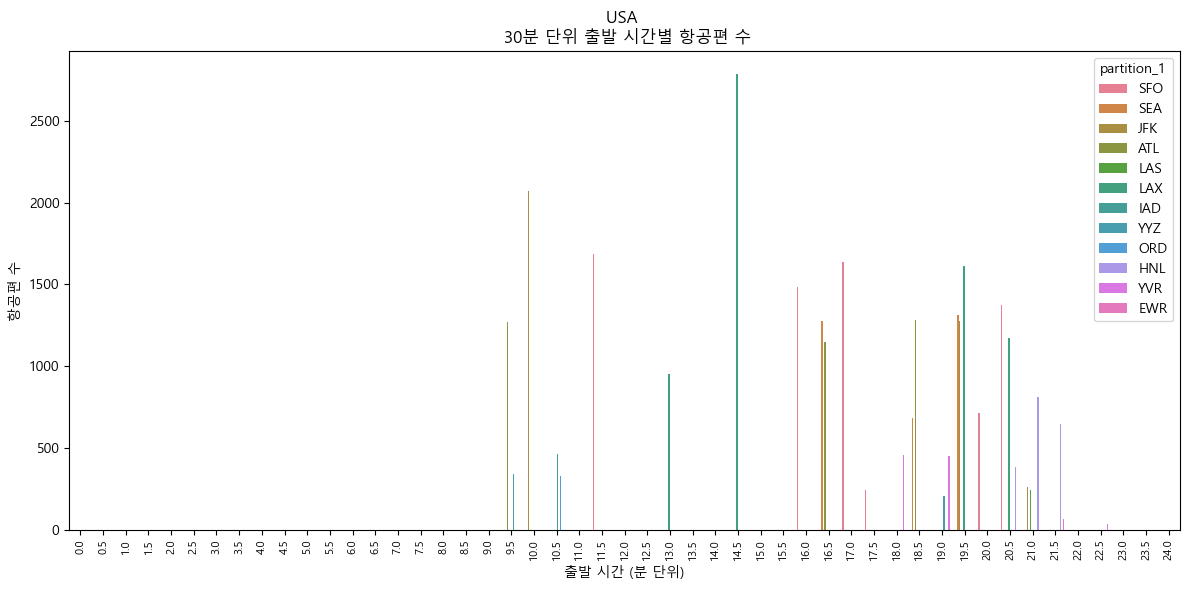

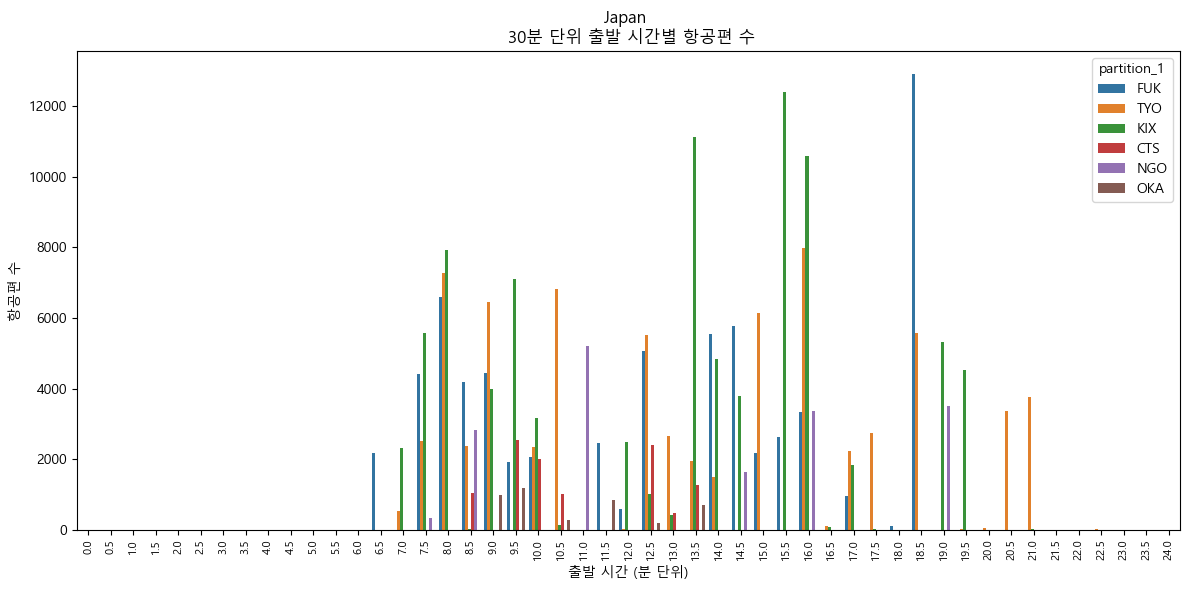

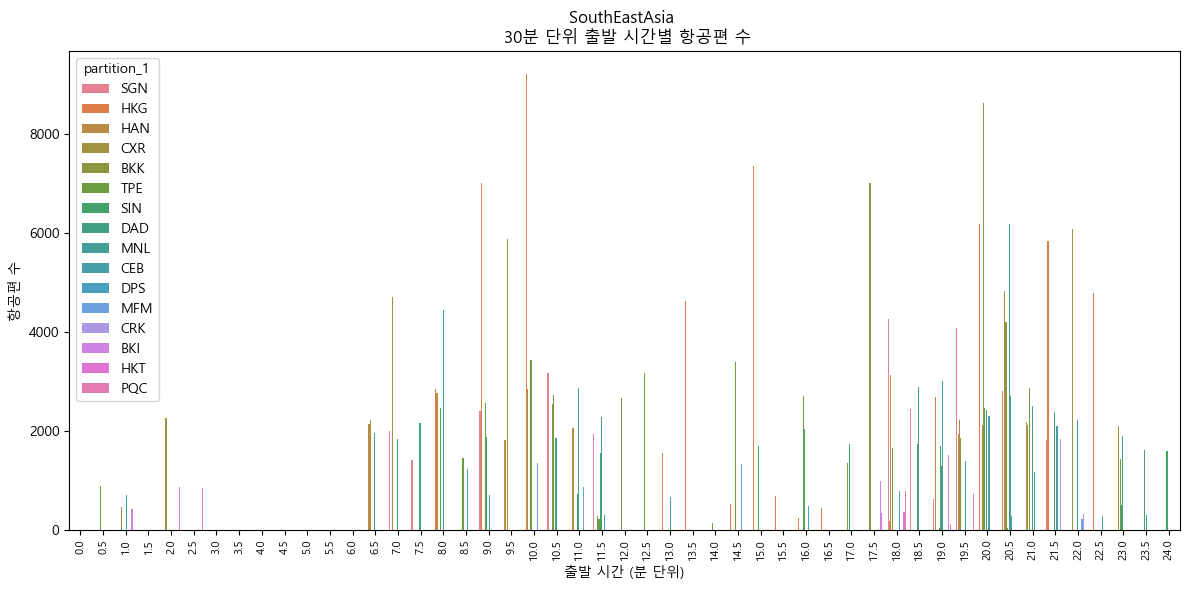

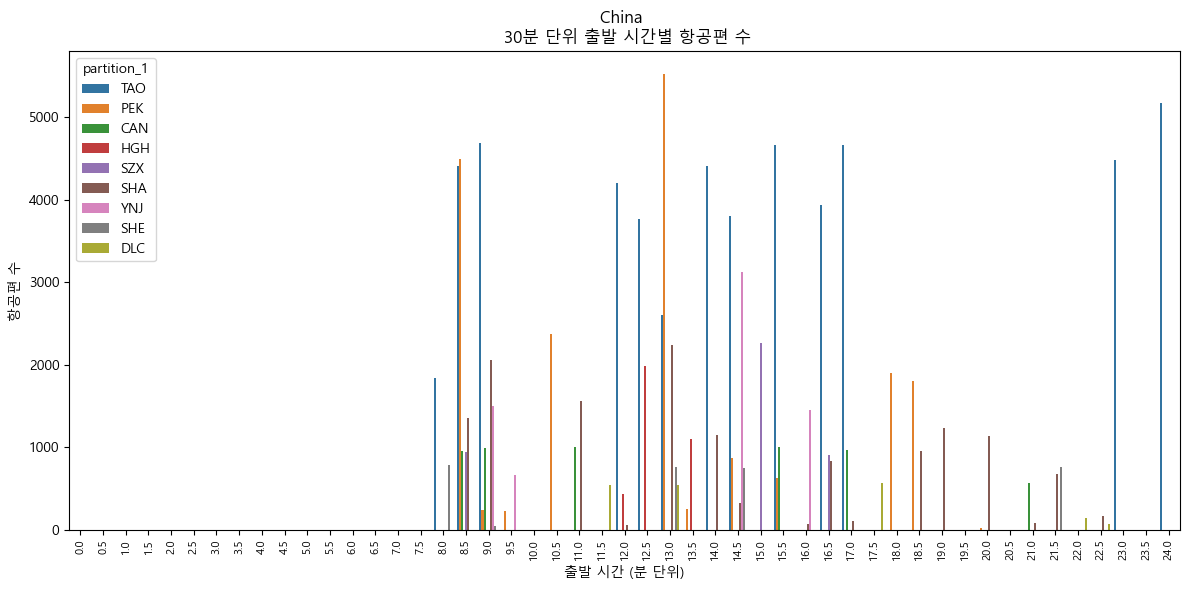

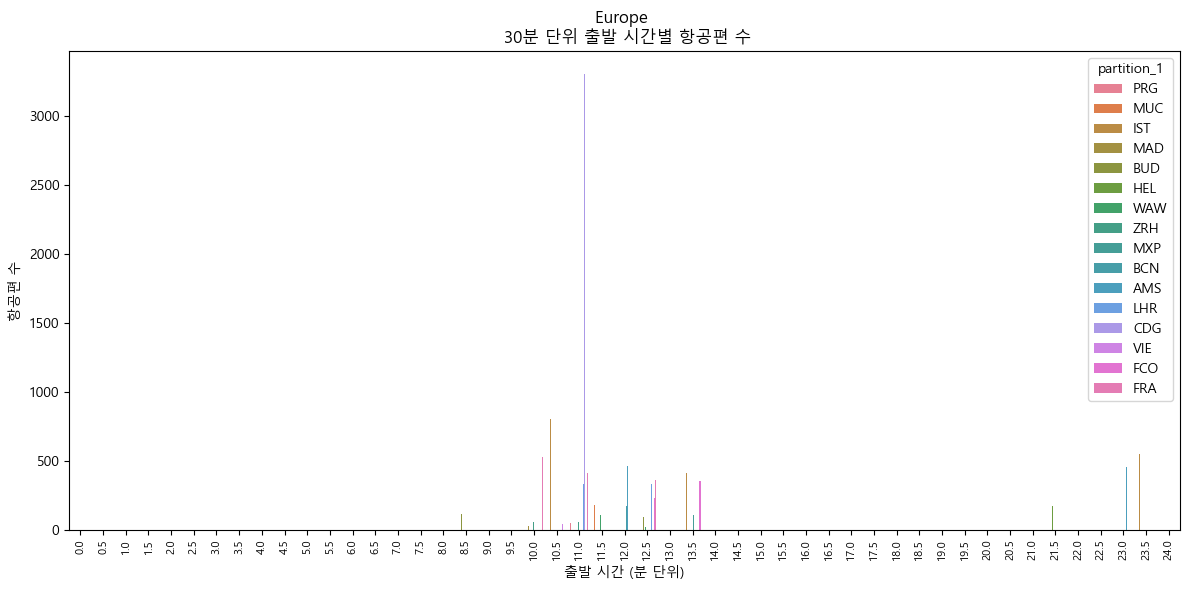

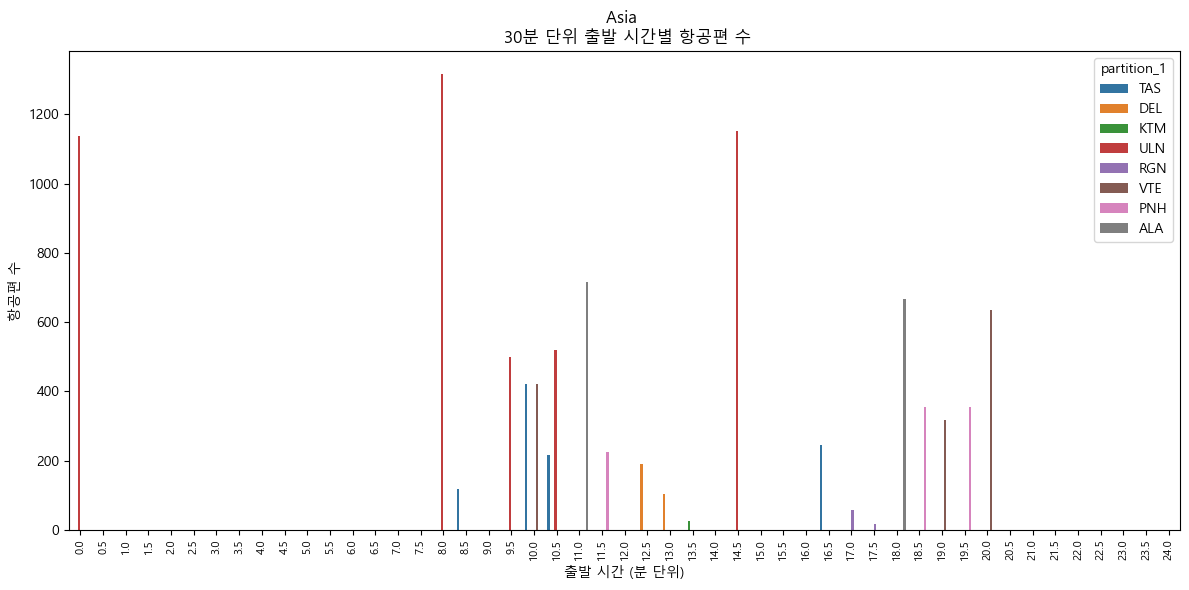

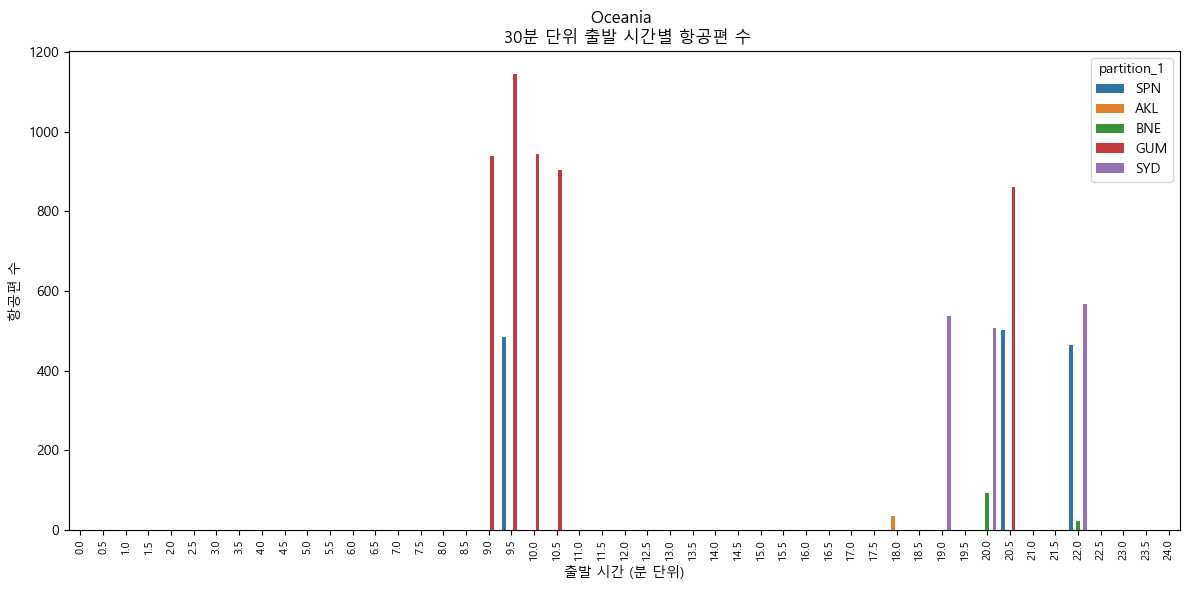

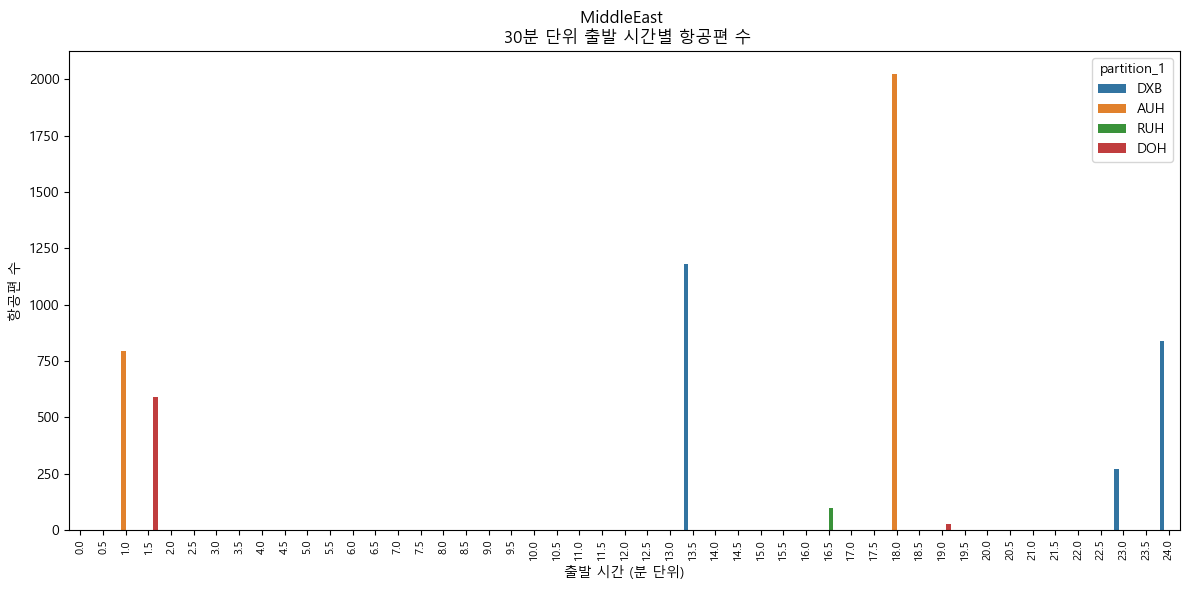

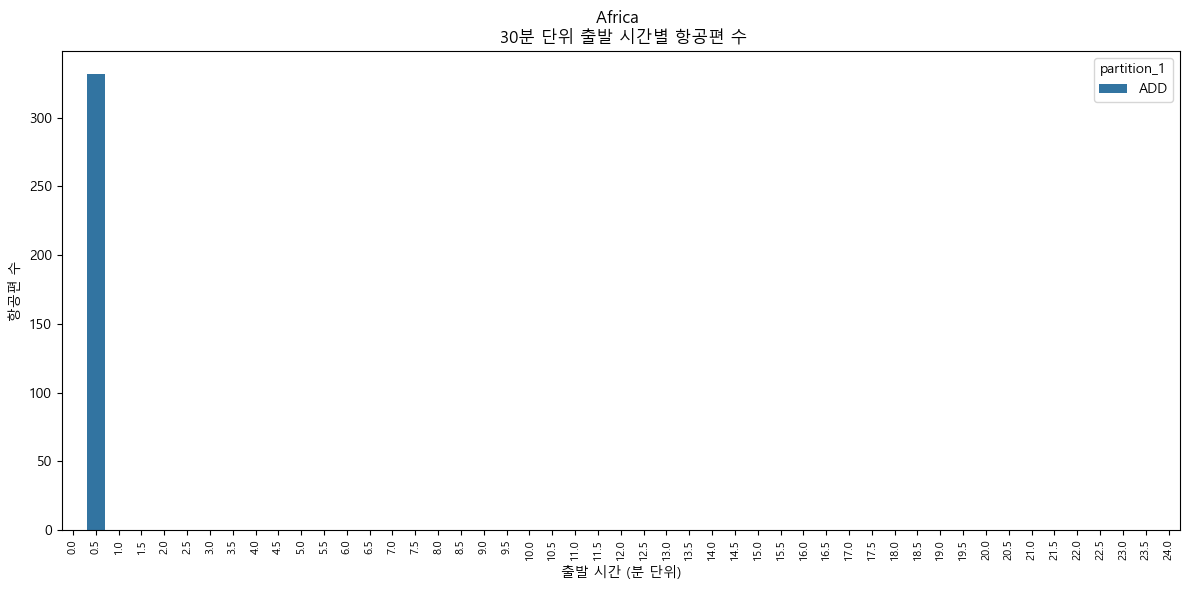

In [8]:
for region in merged_df['partition_0'].unique():
    

    plt.figure(figsize=(12, 6))
    sns.barplot(x='hours', y='cnt',hue='partition_1', data=merged_df.loc[merged_df['partition_0']==region])
    plt.xlabel('출발 시간 (분 단위)')
    plt.ylabel('항공편 수')
    plt.title(f'{region} \n 30분 단위 출발 시간별 항공편 수')
    plt.xticks(rotation=90, size=8)
    plt.tight_layout()

    # 그래프 보여주기
    plt.show()

In [6]:


plt.figure(figsize=(12, 6))
plt.bar(x='hours', height='cnt', data=final_df)
plt.xlabel('출발 시간 (분 단위)')
plt.ylabel('항공편 수')
plt.title('30분 단위 출발 시간별 항공편 수')
plt.xticks(ticks=hours, rotation=90, size=8)
plt.tight_layout()

# 그래프 보여주기
plt.show()

NameError: name 'final_df' is not defined

<Figure size 1200x600 with 0 Axes>